<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/III.%20Matematica_Ciencia_Datos/Actividad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NOMBRE :RICHARD QUISPE MENDEZ**

# Ejercicio 1

Usar el conjunto de datos Arvertising y determinar los siguientes Modelos de regresión lineal

*   Sales = $\beta_0$ + $\beta_1 \times $ TV
*   Sales = $\beta_0$ + $\beta_1 \times $ Radio
*   Sales = $\beta_0$ + $\beta_1 \times $ Newspaper
*   Sales = $\beta_0$ + $\beta_1 \times $ TV +$\beta_2 \times $ Radio + $\beta_3 \times $ Newspaper
*   Sales = $\beta_0$ + $\beta_1 \times $ TV +$\beta_2 \times $ Radio + $\beta_3 \times $ TV $\times $ Radio

En cada caso, obtener el MSE y el MAE.

$$MSE=\frac{\displaystyle\sum_{i=1}^{N}(Y_{\text{real},i}-Y_{\text{pred},i})^{2}}{N}$$


$$MAE=\frac{\displaystyle\sum_{i=1}^{N}  |Y_{\text{real},i}-Y_{\text{pred},i}|}{N}$$


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
datos=pd.read_csv("/content/Advertising.csv")

In [ ]:
datos

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
matriz_corr = datos.corr()
matriz_corr["sales"].sort_values(ascending=False)

sales         1.000000
TV            0.782224
radio         0.576223
newspaper     0.228299
Unnamed: 0   -0.051616
Name: sales, dtype: float64

Apreciamos que los medios como TV y radio tienen mayor correlacion con la variable target

In [ ]:
y=np.array([datos["sales"]]).T
n=len(y)

**MODELO 1**

In [ ]:
x1=np.array([datos["TV"]]).T
X1 = np.concatenate([np.ones([n,1]),x1],axis=1)
betas1=np.linalg.solve(X1.T@X1,X1.T@y)
yHat1=X1@betas1

In [ ]:
MAE1=sum(abs(y-yHat1))/n
MAE1

array([2.54980604])

In [ ]:
MSE1=sum((y-yHat1)**2)/n
MSE1

array([10.51265292])

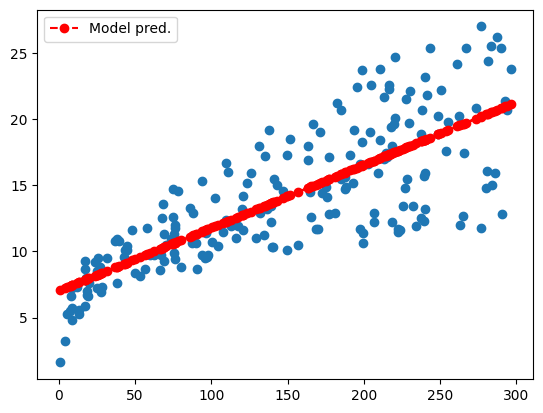

In [ ]:
plt.scatter(datos["TV"],y)
plt.plot(datos["TV"],yHat1,'ro--',label='Model pred.')
plt.legend()
plt.show()

**MODELO 2**

In [ ]:
x2=np.array([datos["radio"]]).T
X2 = np.concatenate([np.ones([n,1]),x2],axis=1)
betas2=np.linalg.solve(X2.T@X2,X2.T@y)
yHat2=X2@betas2

In [ ]:
MAE2=sum(abs(y-yHat2))/n
MAE2

array([3.3202188])

In [ ]:
MSE2=sum((y-yHat2)**2)/n
MSE2

array([18.09239775])

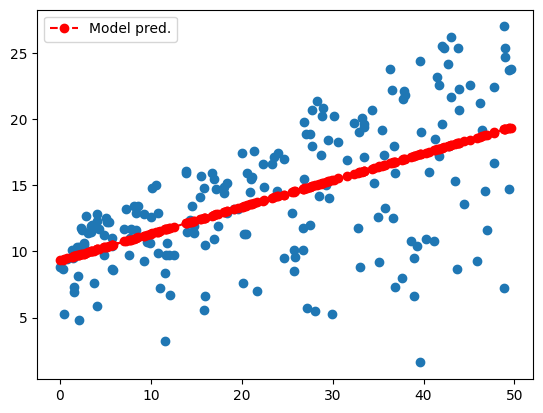

In [ ]:
plt.scatter(datos["radio"],y)
plt.plot(datos["radio"],yHat2,'ro--',label='Model pred.')
plt.legend()
plt.show()

**MODELO 3**

In [ ]:
x3=np.array([datos["newspaper"]]).T
X3 = np.concatenate([np.ones([n,1]),x3],axis=1)
betas3=np.linalg.solve(X3.T@X3,X3.T@y)
yHat3=X3@betas3

In [ ]:
MAE3=sum(abs(y-yHat3))/n
MAE3

array([4.14655974])

In [ ]:
MSE3=sum((y-yHat3)**2)/n
MSE3

array([25.67402272])

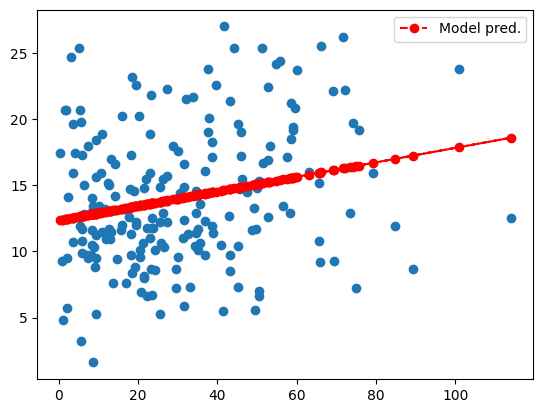

In [ ]:
plt.scatter(datos["newspaper"],y)
plt.plot(datos["newspaper"],yHat3,'ro--',label='Model pred.')
plt.legend()
plt.show()

**MODELO 4 TV, RADIO, NEWSPAPER**

In [ ]:
x4=np.array([datos["TV"],datos["radio"],datos["newspaper"]]).T

In [ ]:
X4 = np.concatenate([np.ones([n,1]),x4],axis=1)
betas4=np.linalg.solve(X4.T@X4,X4.T@y)
yHat4=X4@betas4

In [ ]:
MAE4=sum(abs(y-yHat4))/n
MAE4

array([1.25201123])

In [ ]:
MSE4=sum((y-yHat4)**2)/n
MSE4

array([2.78412631])

Text(0, 0.5, 'Y predicho')

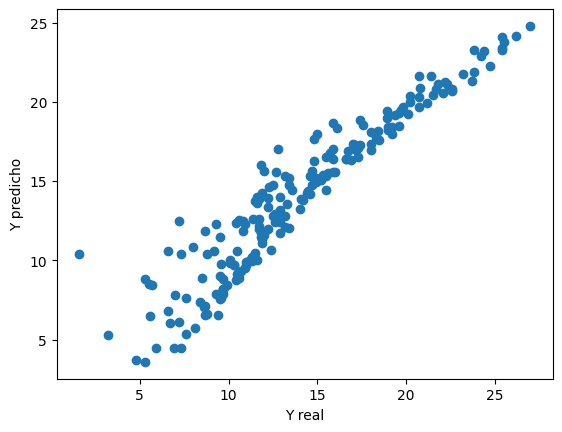

In [ ]:
plt.scatter(y,yHat4)
plt.xlabel('Y real')
plt.ylabel('Y predicho')

**MODELO 5 TV, RADIO, TV*RADIO**

In [ ]:
x5=np.array([datos["TV"],datos["radio"],datos["TV"]*datos["radio"]]).T
X5 = np.concatenate([np.ones([n,1]),x5],axis=1)
betas5=np.linalg.solve(X5.T@X5,X5.T@y)
yHat5=X5@betas5

In [ ]:
MAE5=sum(abs(y-yHat5))/n
MAE5

array([0.66048372])

In [ ]:
MSE5=sum((y-yHat5)**2)/n
MSE5

array([0.87241691])

Text(0, 0.5, 'Y predicho')

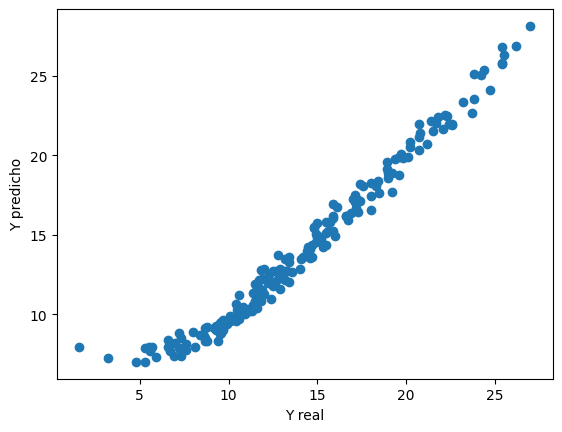

In [ ]:
plt.scatter(y,yHat5)
plt.xlabel('Y real')
plt.ylabel('Y predicho')

**RESUMEN DE METRICAS DE LOS  MODELOS**

In [ ]:
df = pd.DataFrame()
modelos=['Modelo 1_TV','Modelo 2_radio','Modelo 3_newspaper','Modelo 4_TV_radio_News','Modelo 5_TV_radio_TV*radio']
mae=[MAE1,MAE2,MAE3,MAE4,MAE5]
mse=[MSE1,MSE2,MSE3,MSE4,MSE5]
df['Modelo'] = modelos
df['MAE']=mae
df['MSE']=mse

In [ ]:
df

,Modelo,MAE,MSE
0,Modelo 1_TV,[2.549806038927486],[10.512652915656759]
1,Modelo 2_radio,[3.3202187976420645],[18.09239774512543]
2,Modelo 3_newspaper,[4.146559743838488],[25.674022720559698]
3,Modelo 4_TV_radio_News,[1.252011229687071],[2.7841263145109365]
4,Modelo 5_TV_radio_TV*radio,[0.6604837217764856],[0.8724169131386357]


Según las métricas el mejor modelo es el Modelo 5, pero cabe resaltar que la varible newspaper no se utilizó y se incluyo una nueva variable que es el producto de las dos usadas.


# Ejercicio 2

Usar el conjunto de datos Salary_dataset y determinar los modelos de regresión polinomial de la forma:


$$Salary = \beta_0 + \beta_1 \times  \text{YearsExperience} + \beta_1 \times  \text{YearsExperience}^{2}+ \cdots + \text{YearsExperience}^{P} $$

Evaluar para cada $P=1,2,3,4,5$ y obtener el valor de $P$ más adeacuado en función del MSE y MAE.


In [ ]:
datos1=pd.read_csv("/content/Salary_dataset.csv")

In [ ]:
y1=np.array([datos1["Salary"]]).T
n2=len(y1)

**MODELO 1: P=1**

In [ ]:
x11=np.array([datos1["YearsExperience"]]).T
X11 = np.concatenate([np.ones([n2,1]),x11],axis=1)
betas11=np.linalg.solve(X11.T@X11,X11.T@y1)
yHat11=X11@betas11

In [ ]:
MAE11=sum(abs(y1-yHat11))/n2
MAE11

array([4644.20128944])

In [ ]:
MSE11=sum((y1-yHat11)**2)/n2
MSE1

array([10.51265292])

**MODELO 2: P=2**

In [ ]:
X12 = np.concatenate([np.ones([n2,1]),x11,x11**2],axis=1)
betas12=np.linalg.solve(X12.T@X12,X12.T@y1)
yHat12=X12@betas12

In [ ]:
MAE12=sum(abs(y1-yHat12))/n2
MAE12

array([4653.06904475])

In [ ]:
MSE12=sum((y1-yHat12)**2)/n2
MSE12

array([31257508.4509472])

**MODELO 3:  P=3**

In [ ]:
X13 = np.concatenate([np.ones([n2,1]),x11,x11**2,x11**3],axis=1)
betas13=np.linalg.solve(X13.T@X13,X13.T@y1)
yHat13=X13@betas13

In [ ]:
MAE13=sum(abs(y1-yHat13))/n2
MAE13

array([4269.07045755])

In [ ]:
MSE13=sum((y1-yHat13)**2)/n2
MSE13

array([26446769.60683776])

**MODELO 4: P=4**

In [ ]:
X14 = np.concatenate([np.ones([n2,1]),x11,x11**2,x11**3,x11**4],axis=1)
betas14=np.linalg.solve(X14.T@X14,X14.T@y1)
yHat14=X14@betas14

In [ ]:
MAE14=sum(abs(y1-yHat14))/n2
MAE14

array([4265.60894901])

In [ ]:
MSE14=sum((y1-yHat14)**2)/n2
MSE14

array([26403845.62388004])

**MODELO 5:  P=5**

In [ ]:
X15 = np.concatenate([np.ones([n2,1]),x11,x11**2,x11**3,x11**4,x11**5],axis=1)
betas15=np.linalg.solve(X15.T@X15,X15.T@y1)
yHat15=X15@betas15

In [ ]:
MAE15=sum(abs(y1-yHat15))/n2
MAE15

array([4126.05095721])

In [ ]:
MSE15=sum((y1-yHat15)**2)/n2
MSE15

array([24297997.74883126])

In [ ]:
df1 = pd.DataFrame()

In [ ]:
modelos=['P1','P2','P3','P4','P5']
mae1=[MAE11,MAE12,MAE13,MAE14,MAE15]
mse1=[MSE11,MSE12,MSE13,MSE14,MSE15]
df1['Modelo'] = modelos
df1['MAE']=mae1
df1['MSE']=mse1
df1

,Modelo,MAE,MSE
0,P1,[4644.201289443537],[31270951.722280957]
1,P2,[4653.069044746794],[31257508.4509472]
2,P3,[4269.070457553548],[26446769.606837764]
3,P4,[4265.608949008579],[26403845.62388004]
4,P5,[4126.050957208505],[24297997.748831265]


Se aprecia que según va aumentando el grado del polinomio las métricas MAE Y MSE van disminuyendo, por consiguiente podemos decir que el valor del P más adecuado es el 5.